# Time series prediction (Part 1 - 0.5 day)

**NB objective**
- [ ] Get to know the theory behind time series
- [ ] Discover main time series analysis challenges

**Required librairies**
- [ ] matplotlib
- [ ] numpy

## How to deal with Time series ?

To be brief, when dealing with time series, few checks are required and for your greatest pleasure... a bit of theory helps... 
😁

DO NOT USE CHATGPT. Struggling is part of the learning process.

### Theory

The time series (TS) come with some concept such as tendancy, seasonality, stationarity, autoregressivity, etc...  We'll see below these concepts, their definitions.

#### Tendancy and seasonality

1. Give the definition of tendancy, seasonality and residue.
2. Create one or multiple figures with matplotlib to explain these concepts. Be creative and pay attention to the color and the legend to be clear.

# `Write your definitions here`

well tendency is if we talk about for example a data that can be explained via a linear regression then tendency can be explained as a slope (positive or negative),
or it is a global behaviour of data (like in a first glance describtion, function that you can descriv=be the data with).

seasonality is a periodic behavior of data (or particularr features). it can be related to real seasons, days etc, or just cycles or any other time period.

residue is all that can not be explained by both tendency and seaonality (anomalies, outliers, extremes)

In [273]:
# code to display the matplotlib figure(s).
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=500, freq='D')
seasonal_component = 10 * np.sin(np.linspace(0, 15 * np.pi, 500))
data = np.random.randn(500).cumsum() + seasonal_component

num_outliers = 5
outlier_indices = np.random.choice(range(500), size=num_outliers, replace=False)
data[outlier_indices] += np.random.uniform(20, 30, size=num_outliers)
                                   
df = pd.DataFrame(data, index=date_range, columns=['Value'])
df['seasonal'] = seasonal_component

In [19]:
df.head()

,Value
2023-01-01,0.496714
2023-01-02,1.309010
2023-01-03,2.898651
2023-01-04,5.346494
2023-01-05,6.011639


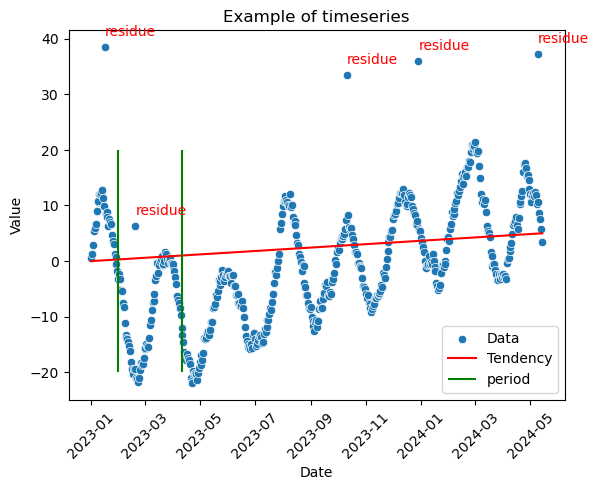

In [275]:
import seaborn as sns

sns.scatterplot(df['Value'])
plt.plot([min(df.index),max(df.index)],[0,5],  c='red', label='tendency')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.vlines(x=[df.index[30], df.index[100]], ymin = -20, ymax=20, color='green')
plt.title('Example of timeseries')

for i in outlier_indices:
    plt.text(df.index[i], df['Value'][i] + 2, f'residue', color='red', fontsize=10)

plt.legend(['Data','Tendency','period']);

The TS come with additive or multiplicative decomposition.  
Explain what it is?  
Also, what kind of mathematical operator can transform a multiplicative decomposition into an additive one ?

# `Reply here`

These are methods to separate a timeseries into: trend, seasonality, and residual

additive: a sum of these three
multiplicative: a multiplication of these three

#### Autocorrelation partial or not

The auto-correlation is an important concept to evaluate the auto-regressive aspect of one signal.  
1. Give the definition of the autocorrelation : $ p(h) = corr(Y_t, Y_t-_h) $.  
2. Explain how to calculate the autocorrelation? Create a function well documented with an example with one very autocorrelated signal and one another not.

# `Write your definition there`

it is a correlation between a data Y(t) and data at some time delay h (lagged) Y(t - h) ( degree of similarity between a given time series and a lagged version of itself), it ranges in -1 and 1.

In [104]:
df['Value'][:10]

2023-01-01     0.496714
2023-01-02     1.301413
2023-01-03     2.883662
2023-01-04     5.324520
2023-01-05     5.983284
2023-01-06     6.609195
2023-01-07     9.007923
2023-01-08    10.547037
2023-01-09    10.794529
2023-01-10    11.992952
Freq: D, Name: Value, dtype: float64

In [110]:
lags = range(20)

In [112]:
[0] * len(lags)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [271]:
# write your code for evaluate auto-correlation

lags = range(5)

def auto_corr(series, lags):
    
    corr = [0] * len(lags) # create an correlation array filled with zeros
    mean = sum(series) / len(series) # average of data
    variance = sum([(i - mean)**2 for i in series]) / len(series) # data variance
    series = [i - mean for i in series]
    for i in lags:
        c = 1 # so called self correlation
        if (i > 0):
            tmp = [series[i:][j] * series[:-i][j] for j in range(len(series) - i)] # calc covariance
            c = sum(tmp) / len(series) / variance # final formula

        corr[i] = c # replace our 0 with actual correlation values
    return corr

In [277]:
corr = auto_corr(df['Value'], lags=lags)

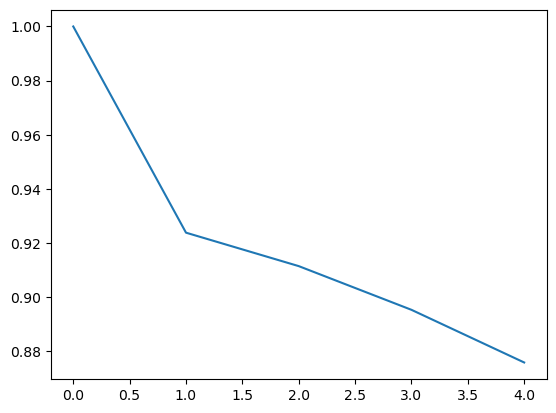

In [279]:
plt.plot(corr);

In [281]:
data = np.random.randn(500).cumsum()

num_outliers = 10
outlier_indices = np.random.choice(range(500), size=num_outliers, replace=False)
data[outlier_indices] += np.random.uniform(20, 30, size=num_outliers)
                                   
df2 = pd.DataFrame(data, index=date_range, columns=['Value'])

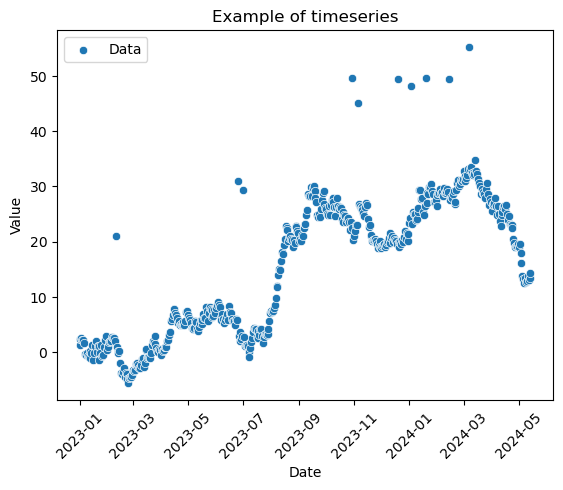

In [283]:
sns.scatterplot(df2['Value'])
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Example of timeseries')

# for i in outlier_indices:
#     plt.text(df.index[i], df2['Value'][i] + 2, f'residue', color='red', fontsize=10)

plt.legend(['Data','Tendency']);

In [285]:
corr2 = auto_corr(df2['Value'], lags=lags)

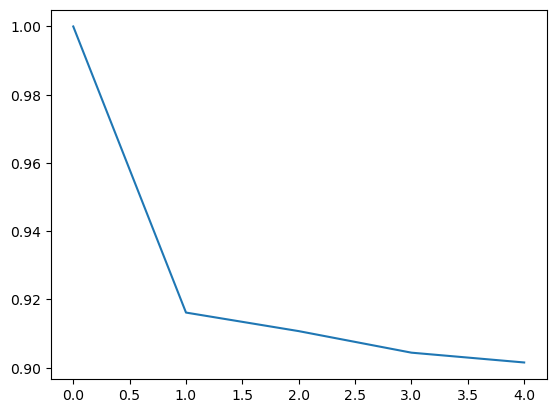

In [287]:
plt.plot(corr2);

#### Stationarity

1. what is the definition of the stationarity for a temporal signal?
2. What are the statistical measures that help you to evaluate if a signal is stationary?

# `write the definition here`

when statistics like mean, medium are not changing with time then the data is stationary

#### Heteroskedasticity

The concept of heteroskedasticity is not only related to time series. It could be related to any type of data regarding one dimension. However, this concept is important in TS.

1. Explain what is heteroskedasticity and its opposite.
2. Create a figure that explain what is heteroskedasticity.

# `write your answer here`
if the error (std) is changing with time

In [322]:
# your code here
date_range = pd.date_range(start='2023-01-01', periods=500, freq='D')
# seasonal_component = 10 * np.sin(np.linspace(0, 5 * np.pi, 500))
component_1 = np.random.randn(500)
for i in range(500):
    component_1[i] = component_1[i] * i*0.5
data = component_1
df3 = pd.DataFrame(data, index = date_range, columns=['Value'])

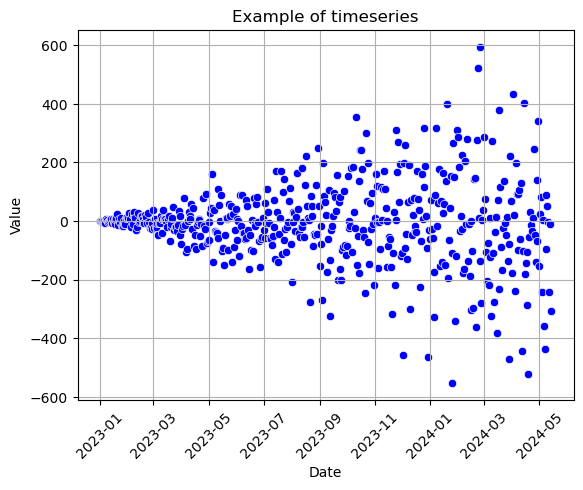

In [330]:
sns.scatterplot(df3['Value'], c='blue')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Example of timeseries')
plt.grid(True);

# plt.legend(['Data','Tendency']);

## Time series and machine learning methodology

The TS are not tabular or common data. The data is structured regarding the time dimension. One item is not just a random one we can put before or after one another. So some rules applied to common data must change, particularly how to train and evaluate data.

#### Train test split for TS

# 1. Explanation of the train test split for TS:  
`reply here`

in TS time is important... so we have to save its order! then test / train split should be done by deviding data without its shuffeling

# 2. Explanation and how to do the Cross-Validation (CV) for TS:  
`reply here with word`

`create a picture that explain CV for TS and show it there`

for CV it is important again to maintain the time order.

so we define the validation set length, and we split our train data by slicing it using validation set dimensions

In [335]:
date_range = pd.date_range(start='2023-01-01', periods=500, freq='D')
seasonal_component = 10 * np.sin(np.linspace(0, 15 * np.pi, 500))
data = np.random.randn(500).cumsum() + seasonal_component

num_outliers = 5
outlier_indices = np.random.choice(range(500), size=num_outliers, replace=False)
data[outlier_indices] += np.random.uniform(20, 30, size=num_outliers)
                                   
df5 = pd.DataFrame(data, index=date_range, columns=['Value'])

In [337]:
df5.shape

(500, 1)

In [339]:
train_set, test_set = df5[:400], df5[400:]

In [351]:
train_set.index[0]

Timestamp('2023-01-01 00:00:00', freq='D')

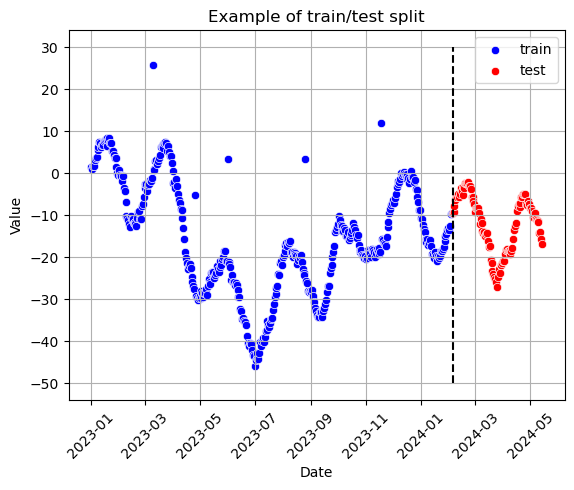

In [357]:
sns.scatterplot(train_set['Value'], c='blue')
sns.scatterplot(test_set['Value'], c='red')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Example of train/test split')
plt.vlines(x=test_set.index[0],ymin=-50,ymax=30,color='black',ls='--')
plt.legend(['train', 'test'])
plt.grid(True);

In [429]:
val = int(len(train_set) / 5)
val * 1

80

In [427]:
# train_set[80:160]

In [431]:
i = 1
val_set = train_set[(val*i):(val+val*i)]

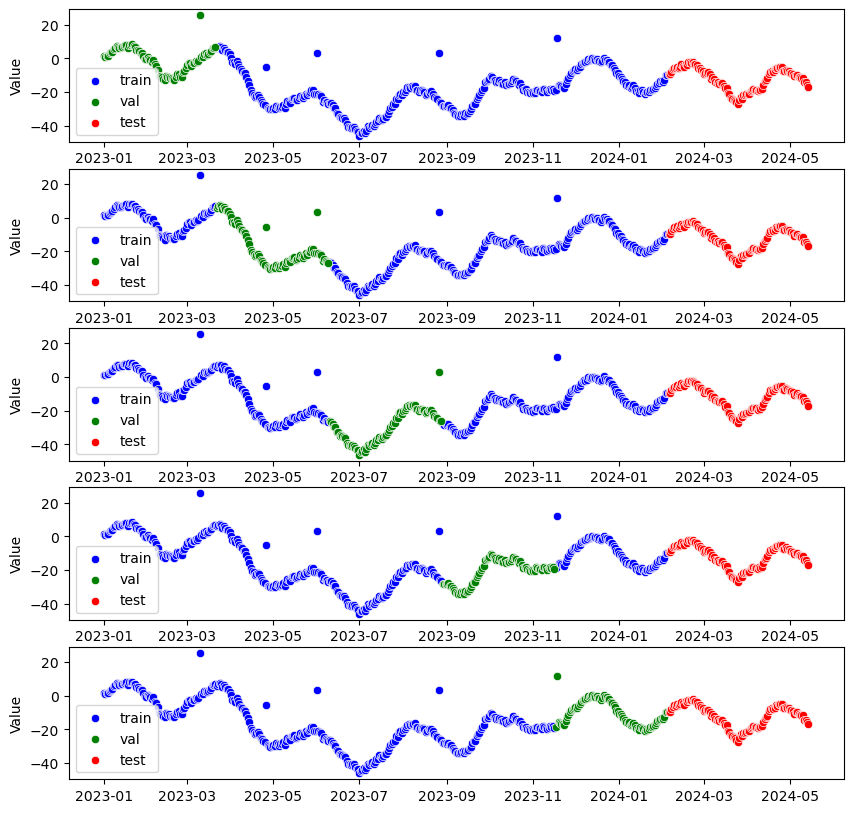

In [437]:
fig, ax = plt.subplots(5,1, figsize=(10,10))
ax = ax.flatten()

for i in range(5):
    train_set_short = train_set.drop(train_set.index[np.arange(val*i, val+val*i,dtype=int)])
    val_set = train_set[val*i:val+val*i]
    sns.scatterplot(train_set_short['Value'], c='blue', ax=ax[i])
    sns.scatterplot(val_set['Value'], c='green',ax = ax[i])
    sns.scatterplot(test_set['Value'], c='red', ax = ax[i])
    ax[i].legend(['train','val','test'])

# Your first `naive` time serie model

The theory is finished.

Now, we need a baseline (as always!) to know if our more complex models are any use! We explore two here:
* seasonal naive - a model which just takes the same period from the previous season. ( in this case the same month last year)
* naive - just carry forward the last value in the series

Given the strong seasonal component that was confirmed, visually by the seasonal decomposition or statistically, it may be a good idea to use a **seasonal naive** forecasting method.  This is part of the *carry forward previous values* family of *naive* forecasting methods.  
In general, if we have data with period $k$ are at time $t$ and we are predicting time $Y_{t+1}$ then we simply carry forward the value from $Y_{t+1-k}$. In other words we have yearly data so we just take the value from the same month last year.

## Load the data

In [439]:
# Import required packages (to be implemented if required)
from pandas import date_range
from pmdarima.datasets import load_airpassengers

START_DATE = "1949-01-01"
airline = load_airpassengers(as_series=True)

# there's no datetimeindex from the bundled dataset. So let's add one.
airline.index = date_range(START_DATE, periods=len(airline), freq="MS")

## Look at the data and determine seasonality

To get the seasonality you can use the function `decompose` and `decomposed_plot` from `pmdarima`. Plot with different lag and observe the results. When you get a periodic signal for seasonality without seasonality for trend and random (=residue), you can conclude you have a seasonal signal and its length of seasonality.

In [445]:
# your code here
from pmdarima.arima import decompose
from pmdarima.utils import decomposed_plot

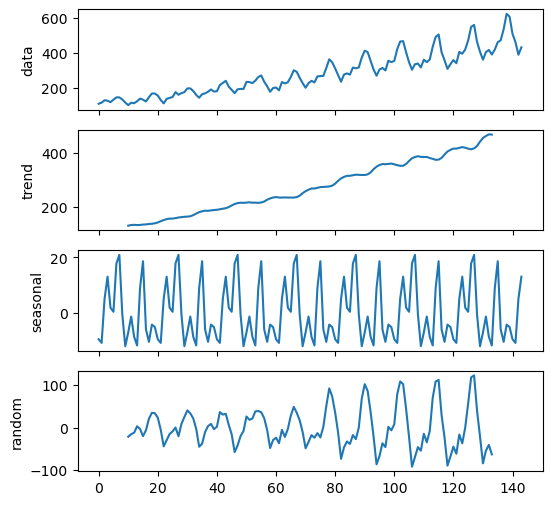

In [477]:
figure_kwargs = {'figsize': (6, 6)}

decomposed = decompose(airline.values, 'additive', 20)
axes = decomposed_plot(decomposed, figure_kwargs = figure_kwargs, show=False)

# `your observation and conclusion here`

the trend is positive and 'linear', there is a seasonality and a heterscedasticy (random is cahnging with time)

## Train / Test split the data.

What is the best way to train / test split time series ? Let's create a function to do it.

In [519]:
min(airline.index), max(airline.index)

(Timestamp('1949-01-01 00:00:00', freq='MS'),
 Timestamp('1960-12-01 00:00:00', freq='MS'))

In [495]:
airline[airline.index == '1949-01-01']

1949-01-01    112.0
Freq: MS, dtype: float64

In [511]:
def ts_train_test_split(data, split_date):
    split_index = data.reset_index()[data.reset_index()['index'] == split_date].index[0]
    train = data[:split_index]
    return data[:split_index], data[split_index:]

In [531]:
split_date = '1958-12-01'
data = airline.copy()
train_set, test_set = ts_train_test_split(data, split_date)

In [533]:
train_set.shape, test_set.shape

((119,), (25,))

## Build your naive model

look at the documentation:
- for naive model: [click here](https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#naive)
- for seasonal naive model: [click here](https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#seasonalnaive-2)

**Note**: statsforecast present a lot of interesting model and tool. But we won't see them in this module.

In [547]:
import statsforecast

ImportError: cannot import name 'ThreadpoolController' from 'threadpoolctl' (C:\Users\druzh\anaconda3\lib\site-packages\threadpoolctl.py)

In [539]:
from statsforecast.models import Naive, SeasonalNaive

HORIZON =  5
SEASON_LENGTH = 2

ImportError: cannot import name 'ThreadpoolController' from 'threadpoolctl' (C:\Users\druzh\anaconda3\lib\site-packages\threadpoolctl.py)

In [ ]:
# you code here

## Look and evaluate your model

1. Plot your prediction and compare it to the ground truth.
2. Calculate the metrics to evaluate with RMSE, MAE and MAPE.
    - use sklearn.metrics or code yourself the metrics (it's easy)

In [5]:
# your code here

Nice! You get your **baseline**. Now go to the second notebook NB2.1 to discover ARIMA models. 